In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1: Define the problem and set your objective

**Goal**: predicting the popularity of a video game based on its features, such as genre, platform, publisher, and release year

### Step 2: Acquire and explore the dataset

In [2]:
df = pd.read_csv('games.csv')
df.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


**Remove 'Unnamed' feature**:

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


#### Data Cleaning
by guide from ChatGPT with GPT-4 described [here](https://a113ssa.github.io/writeup/writeup-3/)

1. Data Exploration:

In [4]:
print(f'General info:\n{df.describe()}')
print()
print(f'Data types:\n{df.dtypes}')
print()
print(f'NAN values:\n{df.isna().sum()}')
print()
print(f'Columns info:\n{df.columns.to_list()}')

General info:
            Rating
count  1499.000000
mean      3.719346
std       0.532608
min       0.700000
25%       3.400000
50%       3.800000
75%       4.100000
max       4.800000

Data types:
Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

NAN values:
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

Columns info:
['Title', 'Release Date', 'Team', 'Rating', 'Times Listed'

2. Handling Missing Values

In [5]:
# Model-based imputation (using KNNImputer from sklearn) of Rating data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Rating'] = imputer.fit_transform(df[['Rating']])

In [6]:
# Check what Game is without Team data
x = df[df.Team.isna()][['Title', 'Genres']]
games_without_team = x.to_csv(header=None, index=False).strip('\n').split('\n')
print(f'Game with no data about Team: {games_without_team}')

Game with no data about Team: ["NEET Girl Date Night,['Visual Novel']"]


In [7]:
# Fill Team by an empty string
df.Team = df.Team.fillna('')
df.isna().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              1
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

3. Data Transformation

In [8]:
#Change K to *1000
def convert_to_thousand(x):
    if('K' in x):
        if len(x)>1:
            return int(float(x.replace('K', '')) * 1000)
        else:
            return 1000
    else:
        return x
    
target_features = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

for i in target_features:
    df[i] = df[i].apply(lambda x: convert_to_thousand(x))
            
df.head(4)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800


In [9]:
from sklearn.preprocessing import LabelEncoder

# Preprocessing steps
df['Team_Encoded'] = LabelEncoder().fit_transform(df['Team'])
df['Genres_Encoded'] = LabelEncoder().fit_transform(df['Genres'])
df['Date_Encoded'] = LabelEncoder().fit_transform(df['Release Date'])
df.head(3)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Team_Encoded,Genres_Encoded,Date_Encoded
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,80,119,280
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,641,21,165
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,459,119,481


In [10]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.date
df.head(3)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Team_Encoded,Genres_Encoded,Date_Encoded
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,80,119,280
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,641,21,165
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,459,119,481


4. Handling Outliers <br>
with the helpt of guide generated by ChatGPT with GPT-4 [here](https://a113ssa.github.io/learn-with-gpt4/handling-outliers/)

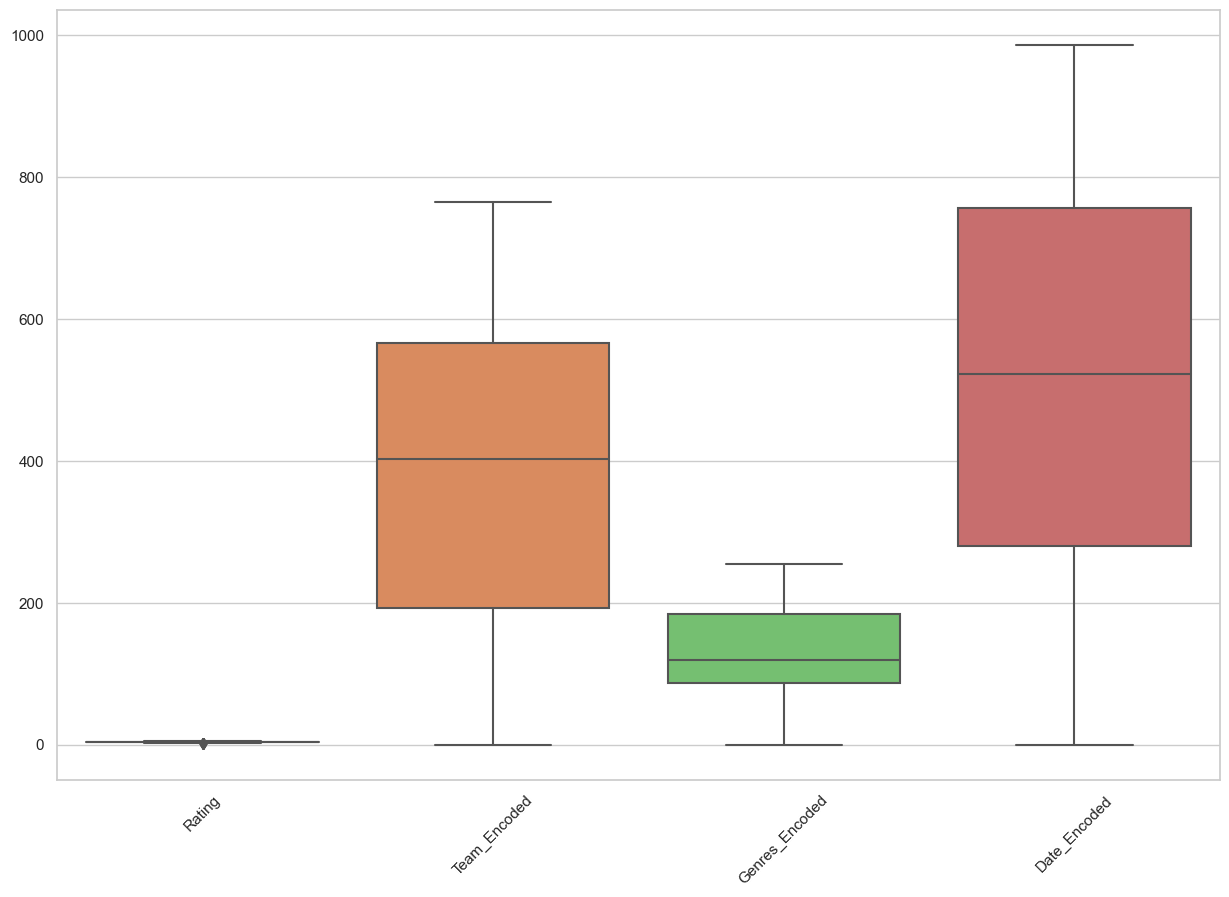

In [11]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [12]:
def detect_outliers_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return ((data < lower_bound) | (data > upper_bound))

outliers = detect_outliers_iqr(df['Rating'])
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 25


Validate approach by comparing the performance of a model trained on the original data and the cleaned data:


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

not_used_features = ['Rating', 'Title', 'Team', 'Genres', 'Release Date', 'Reviews', 'Summary']
X = df.drop(not_used_features, axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trained on original data
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error (original data): {mse}")

data_no_outliers = df[~outliers]

X_no_outliers = data_no_outliers.drop(not_used_features, axis=1)
y_no_outliers = data_no_outliers['Rating']
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Model trained on cleaned data
lr_no_outliers = LinearRegression()
lr_no_outliers.fit(X_train_no, y_train_no)
y_pred_no = lr_no_outliers.predict(X_test_no)
mse_no_outliers = mean_squared_error(y_test_no, y_pred_no)
print(f"Mean squared error (cleaned data): {mse_no_outliers}")


Mean squared error (original data): 0.1378845307024973
Mean squared error (cleaned data): 0.16206285521314104


Lower MSE values indicate better model performance, as they imply smaller differences between the predicted and actual values. In this specific example, the model trained on the original data has a slightly better performance (lower MSE) than the model trained on the cleaned data.